In [4]:
!pip install xgboost -q

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [6]:
# load data 
df= sns.load_dataset ('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
df.shape

(53940, 10)

In [9]:
df['cut'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']>

In [10]:
# split the data into x and y
x = df.drop(['cut'],axis=1)
y = df['cut']

In [11]:
# encode the input variables
le = LabelEncoder()
x['color'] = le.fit_transform(x['color'])
x['clarity'] = le.fit_transform(x['clarity'])


In [12]:
# train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
# train decesion tree model 
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# predict 
y_pred = model.predict(x_test)

In [15]:
# evaluate 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

        Fair       0.84      0.85      0.85       335
        Good       0.66      0.69      0.68      1004
       Ideal       0.81      0.79      0.80      4292
     Premium       0.74      0.74      0.74      2775
   Very Good       0.54      0.55      0.54      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.72      0.72     10788

[[ 286   33    3    6    7]
 [  33  693   23   31  224]
 [   4   27 3409  337  515]
 [   8   56  313 2042  356]
 [   9  239  471  358 1305]]


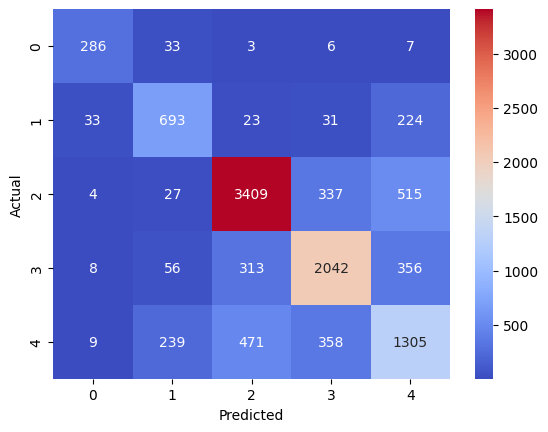

In [16]:
# plot confusion matrix 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
%%time
# train the random forest model
model = RandomForestClassifier()
model.fit(x_train,y_train)
#pridict
y_pred = model.predict(x_test)
# print the matircs using f setring
print(classification_report(y_test,y_pred))
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"precision {precision_score(y_test,y_pred,average='macro')}")
print(f"recall {recall_score(y_test,y_pred,average='macro')}")
print(f"f1 {f1_score(y_test,y_pred,average='macro')}")



              precision    recall  f1-score   support

        Fair       0.92      0.90      0.91       335
        Good       0.78      0.70      0.74      1004
       Ideal       0.83      0.91      0.87      4292
     Premium       0.78      0.82      0.79      2775
   Very Good       0.68      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.77      0.78     10788
weighted avg       0.78      0.79      0.78     10788

accuracy 0.78596588802373
precision 0.7962601197378308
recall 0.7741852220853419
f1 0.7825877065075155
CPU times: total: 8.67 s
Wall time: 8.69 s


In [18]:
%%time
# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train XGBoost on encoded labels
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

# Predict
y_pred = model.predict(x_test)

# Evaluate
print(f"accuracy {accuracy_score(y_test_encoded, y_pred)}")
print(f"precision {precision_score(y_test_encoded, y_pred, average='macro')}")
print(f"recall {recall_score(y_test_encoded, y_pred, average='macro')}")
print(f"f1 {f1_score(y_test_encoded, y_pred, average='macro')}")


accuracy 0.8056173526140156
precision 0.816426037421739
recall 0.7929030247334078
f1 0.8028675486282099
CPU times: total: 7.08 s
Wall time: 949 ms


Text(0.5, 1.0, 'XGBoost')

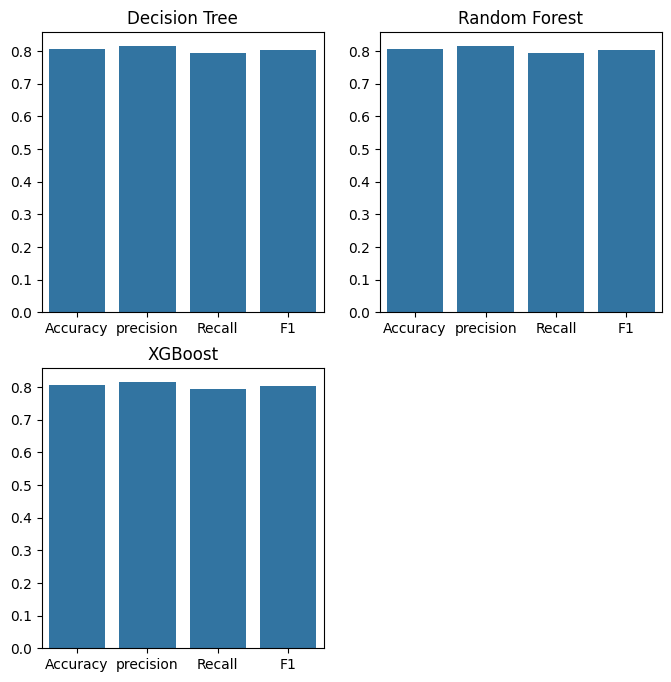

In [28]:
#make a bar plot showing each of the matric with respect to the model, and plots in one row 
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.barplot(x=['Accuracy','precision','Recall','F1'],y=[accuracy_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred,average='macro'),recall_score(y_test_encoded,y_pred,average='macro'),f1_score(y_test_encoded,y_pred,average='macro')])
plt.title('Decision Tree')
plt.subplot(2,2,2)
sns.barplot(x=['Accuracy','precision','Recall','F1'],y=[accuracy_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred,average='macro'),recall_score(y_test_encoded,y_pred,average='macro'),f1_score(y_test_encoded,y_pred,average='macro')])
plt.title('Random Forest')
plt.subplot(2,2,3)
sns.barplot(x=['Accuracy','precision','Recall','F1'],y=[accuracy_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred,average='macro'),recall_score(y_test_encoded,y_pred,average='macro'),f1_score(y_test_encoded,y_pred,average='macro')])
plt.title('XGBoost')